In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\Vivek\Downloads\dataset.csv")

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Obs 1: There is no null values in the dataset

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('target',axis=1)

In [23]:
y = df['target']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212,)
(91,)


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=10)

In [42]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [43]:
y_pred = rfc.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report



In [98]:
report = classification_report(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(report)

0.8131868131868132
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [51]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[32  9]
 [ 8 42]]


In [52]:
# Get feature importances
importances = rfc.feature_importances_

In [53]:
# Get indices of top 5 features
top_indices = np.argsort(importances)[::-1][:5]

In [56]:
importances

array([0.07904989, 0.02980878, 0.1174296 , 0.0751867 , 0.078649  ,
       0.00990972, 0.02055975, 0.09839854, 0.07878318, 0.10711885,
       0.0565417 , 0.15510521, 0.09345907])

In [55]:
top_indices

array([11,  2,  9,  7, 12], dtype=int64)

In [57]:
# Get names of top 5 features
top_features = [X.columns[i] for i in top_indices]

In [58]:
top_features

['ca', 'cp', 'oldpeak', 'thalach', 'thal']

In [60]:
import matplotlib.pyplot as plt

In [64]:
importances[top_indices]

array([0.15510521, 0.1174296 , 0.10711885, 0.09839854, 0.09345907])

In [66]:
# Print top 5 features
print("Top 5 Most Important Features:")
for feature in top_features:
    print(feature)


Top 5 Most Important Features:
ca
cp
oldpeak
thalach
thal


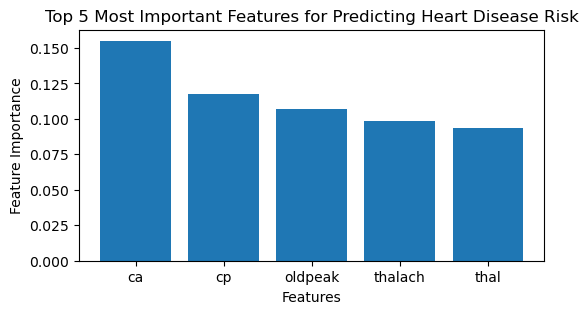

In [81]:
# Visualize feature importances
plt.figure(figsize=(6, 3))
plt.bar(range(len(top_indices)), importances[top_indices], align='center')
plt.xticks( range(len(top_indices)),[X.columns[i] for i in top_indices], rotation=0)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top 5 Most Important Features for Predicting Heart Disease Risk')
plt.show()

In [74]:
range(len(top_indices))

range(0, 5)

## Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [85]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [86]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [88]:
# Get the best model
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10)

In [89]:
# Evaluate the best model on test data
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8351648351648352


In [90]:
# Get the cross-validation scores for each set of hyperparameters
cv_results = grid_search.cv_results_
mean_scores = cv_results['mean_test_score']
std_scores = cv_results['std_test_score']


In [95]:
mean_scores

array([0.81118494, 0.79689922, 0.81572536, 0.81572536, 0.82037652,
       0.82026578, 0.8110742 , 0.81085271, 0.79667774, 0.82037652,
       0.82502769, 0.82990033, 0.80620155, 0.82513843, 0.82513843,
       0.82978959, 0.82513843, 0.8158361 , 0.80631229, 0.82037652,
       0.82502769, 0.81096346, 0.82502769, 0.82978959, 0.80155039,
       0.84894795, 0.82978959, 0.8345515 , 0.80143965, 0.81561462,
       0.81096346, 0.80620155, 0.81550388, 0.80620155, 0.80609081,
       0.80620155, 0.81096346, 0.81096346, 0.82513843, 0.82059801,
       0.8158361 , 0.83001107, 0.83433001, 0.81085271, 0.82037652,
       0.8440753 , 0.81561462, 0.82048726, 0.81550388, 0.82978959,
       0.82978959, 0.83001107, 0.82502769, 0.82524917, 0.8110742 ,
       0.81572536, 0.80620155, 0.80631229, 0.80620155, 0.80631229,
       0.81561462, 0.81561462, 0.82037652, 0.80121816, 0.81572536,
       0.82978959, 0.82513843, 0.82513843, 0.80631229, 0.81085271,
       0.81096346, 0.81085271, 0.82978959, 0.81561462, 0.82502

In [91]:
# Print the mean and standard deviation of cross-validation scores for each set of hyperparameters
print("\nCross-validation scores for each set of hyperparameters:")
for mean_score, std_score, params in zip(mean_scores, std_scores, cv_results['params']):
    print(f"Mean accuracy: {mean_score:.4f} (±{std_score:.4f}) for {params}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
test_accuracy = best_model.score(X_test, y_test)
print("\nTest Accuracy:", test_accuracy)


Cross-validation scores for each set of hyperparameters:
Mean accuracy: 0.8112 (±0.0547) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean accuracy: 0.7969 (±0.0583) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean accuracy: 0.8157 (±0.0597) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean accuracy: 0.8157 (±0.0363) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Mean accuracy: 0.8204 (±0.0707) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean accuracy: 0.8203 (±0.0813) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mean accuracy: 0.8111 (±0.0678) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Mean accuracy: 0.8109 (±0.0630) for {'max_depth': None, 'min_samples_leaf': 

In [104]:
rfc_tuned = RandomForestClassifier(max_depth= None,min_samples_leaf=4, min_samples_split=10)


In [105]:
rfc_tuned.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10)

In [106]:
y_pred1 = rfc_tuned.predict(X_test)

In [107]:
report_tuned = classification_report(y_test, y_pred1)
print(accuracy_score(y_test, y_pred1))
print(report_tuned)

0.8351648351648352
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



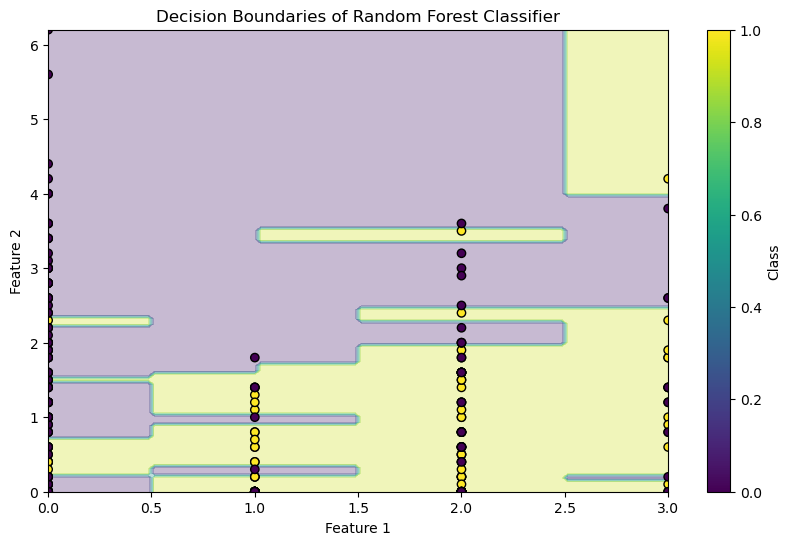

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming X contains the features and y contains the target labels
# Select two most important features (replace with actual feature names)
feature1_idx = np.argmax(importances)
importances[feature1_idx] = 0
feature2_idx = np.argmax(importances)

# Convert X to a NumPy array
X_array = X.values

# Create meshgrid of points covering the range of the two selected features
feature1_values = np.linspace(X_array[:, feature1_idx].min(), X_array[:, feature1_idx].max(), 100)
feature2_values = np.linspace(X_array[:, feature2_idx].min(), X_array[:, feature2_idx].max(), 100)
feature1_mesh, feature2_mesh = np.meshgrid(feature1_values, feature2_values)
mesh_points = np.c_[feature1_mesh.ravel(), feature2_mesh.ravel()]

# Predict class labels for each point in the meshgrid
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_array[:, [feature1_idx, feature2_idx]], y)
mesh_predictions = rf_classifier.predict(mesh_points)
mesh_predictions = mesh_predictions.reshape(feature1_mesh.shape)

# Plot the decision boundaries on scatter plot of the two selected features
plt.figure(figsize=(10, 6))
plt.contourf(feature1_mesh, feature2_mesh, mesh_predictions, alpha=0.3)
plt.scatter(X_array[:, feature1_idx], X_array[:, feature2_idx], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.colorbar(label='Class')
plt.show()
